In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df = pd.read_csv('../data/skylab_instagram_datathon_dataset.csv',header=0, sep=';')

print(df.shape)
df.head(n=5)

(704313, 15)


,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0


In [4]:
df.drop(columns=['period', 'calculation_type'], inplace=True)
df_allbrands = df[df['business_entity_doing_business_as_name'] == 'All Brands'].copy()
df_allbrands.drop(columns=['business_entity_doing_business_as_name','legal_entity_name','domicile_country_name','ultimate_parent_legal_entity_name','primary_exchange_name'], inplace=True)
df.drop(df[df['business_entity_doing_business_as_name'] == 'All Brands'].index, inplace=True)

brands = df['business_entity_doing_business_as_name'].unique()
compset_groups = df['compset_group'].unique()
compsets = df['compset'].unique()

groups_bycompset = {}
for compset in compsets:
    df_compset = df[df['compset'] == compset]
    groups_bycompset[compset] = df_compset['compset_group'].unique()

df_brands = df[['business_entity_doing_business_as_name', 'compset_group', 'compset', 'legal_entity_name', 'domicile_country_name', 'ultimate_parent_legal_entity_name', 'primary_exchange_name']].copy()
df_brands = df_brands.groupby('business_entity_doing_business_as_name').agg({
    'compset_group': 'first',
    'compset': lambda x: sorted(list(set(x))),
    'legal_entity_name': 'first',
    'domicile_country_name': 'first',
    'ultimate_parent_legal_entity_name': 'first',
    'primary_exchange_name': 'first'
}).reset_index()
df.drop(columns=['compset_group', 'compset', 'legal_entity_name', 'domicile_country_name', 'ultimate_parent_legal_entity_name', 'primary_exchange_name'], inplace=True)
#df.fillna(-1, inplace=True)
df.drop_duplicates(inplace=True)

# 1) Understanding Missing Values

In [5]:

df.head()

# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[::]

period_end_date                               0
business_entity_doing_business_as_name        0
followers                                 61727
pictures                                   3864
videos                                     9602
comments                                   4082
likes                                      3752
dtype: int64

<Axes: >

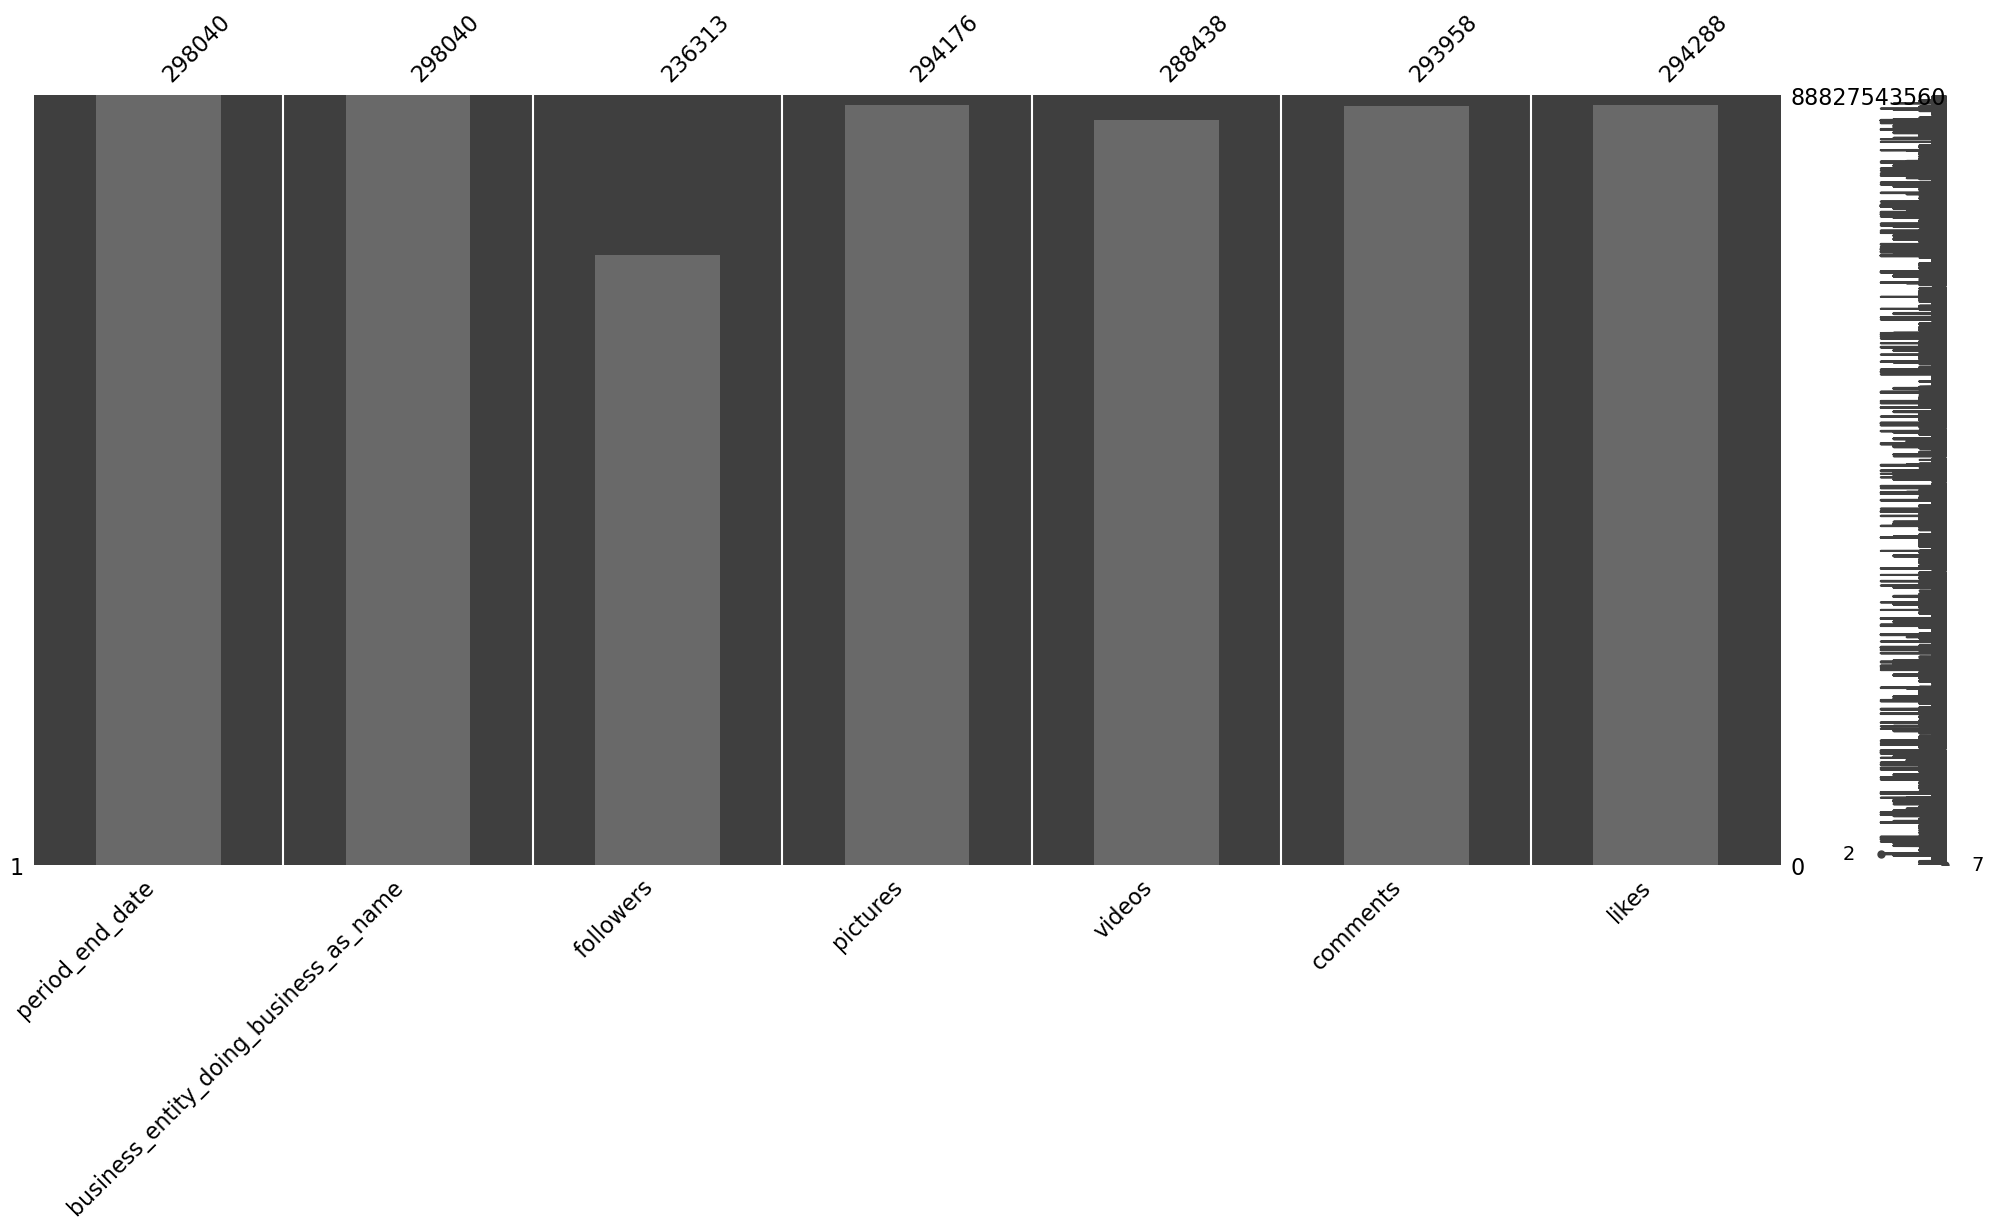

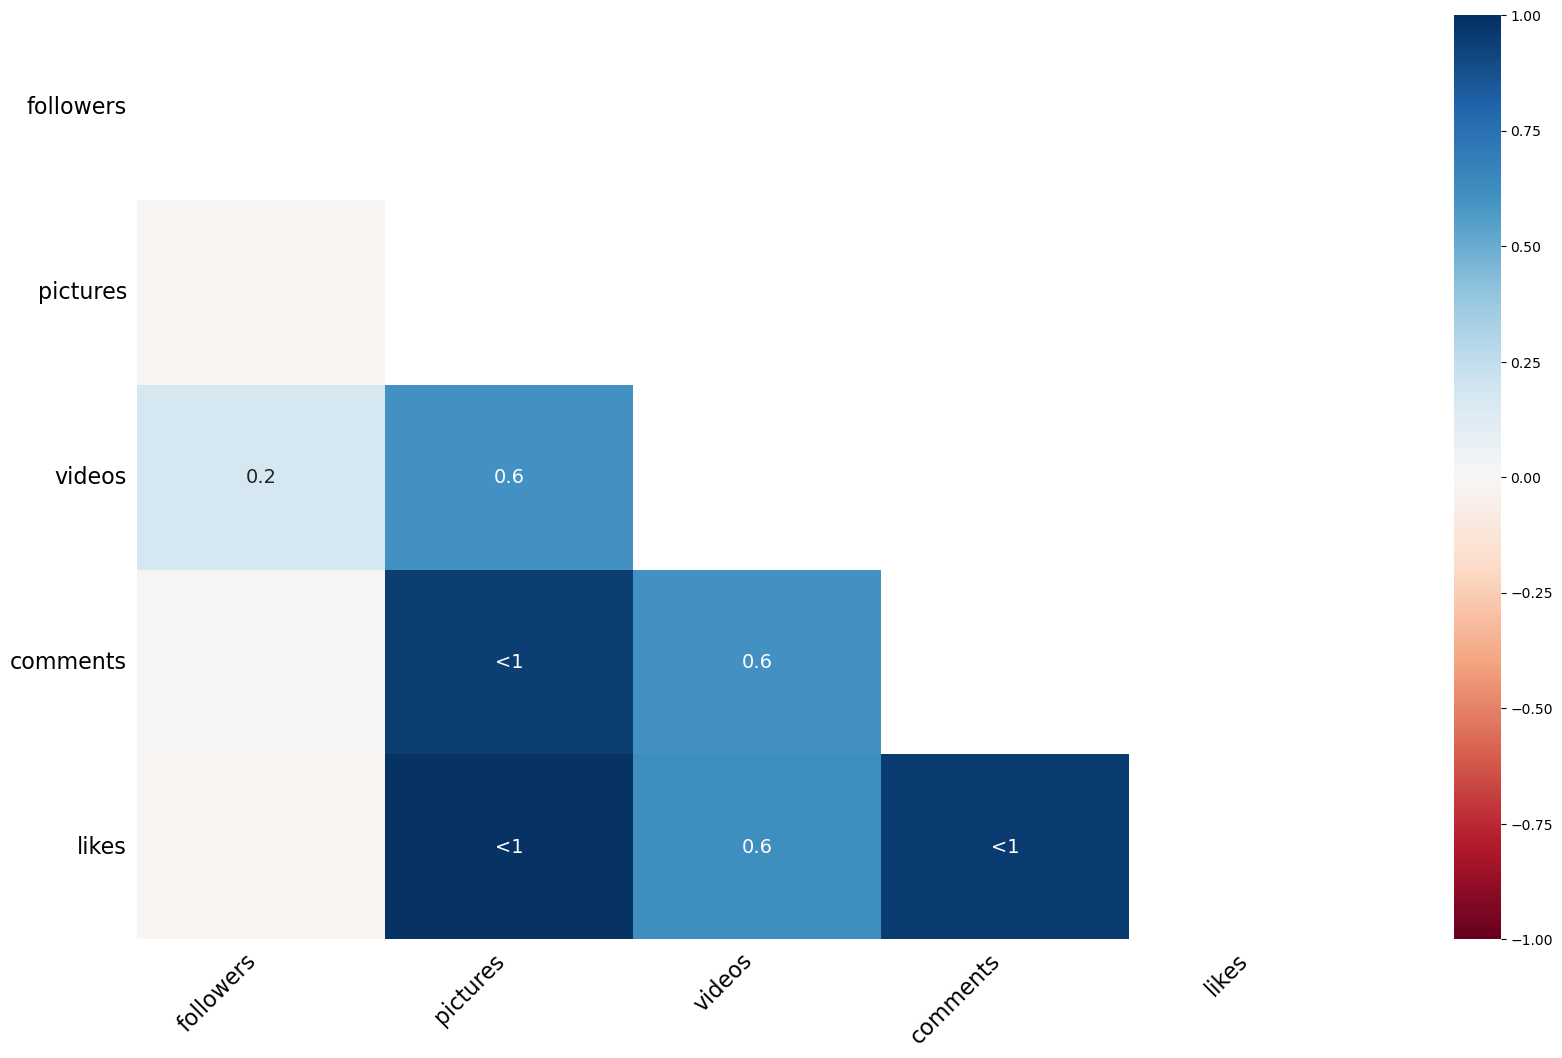

In [214]:
# Visualize the missingness
msno.matrix(df)
msno.bar(df)
msno.heatmap(df)  # Shows the correlation of missingness between every 2 columns

In [215]:
#number of entries for each unique business entity name
entries_per_business = df['business_entity_doing_business_as_name'].value_counts()

print(entries_per_business)

Versace            455
Zegna              455
Crocs              455
Maybelline         455
HomeGoods          455
                  ... 
Sculptra           129
Temu                55
Pop Mart            46
Finding Unicorn     46
ShopGoodwill        26
Name: business_entity_doing_business_as_name, Length: 705, dtype: int64


In [216]:
# Group the data by 'business_entity_doing_business_as_name' and sum missing values across all columns for each business
total_missing_values_per_business = df.groupby('business_entity_doing_business_as_name').apply(lambda x: x.isnull().sum().sum())

# Print the results
print(total_missing_values_per_business)

business_entity_doing_business_as_name
24S                   24
3.1 Phillip Lim       18
3CE                  131
A. Lange & Soehne     17
ANIMALE              133
                    ... 
bareMinerals          25
dd's Discounts         6
e.l.f.                 2
iRobot               370
shopDisney             0
Length: 705, dtype: int64


In [217]:
# Group the data by 'business_entity_doing_business_as_name' and count missing values specifically in the 'followers' column for each business
missing_followers_per_business = df.groupby('business_entity_doing_business_as_name')['followers'].apply(lambda x: x.isnull().sum())

missing_followers_per_business.head()

print(missing_followers_per_business.shape)

(705,)


In [218]:
# Group the data by 'business_entity_doing_business_as_name' and count missing values specifically in the 'followers' column for each business
missing_pictures_per_business = df.groupby('business_entity_doing_business_as_name')['pictures'].apply(lambda x: x.isnull().sum())

missing_pictures_per_business.head()

print(missing_pictures_per_business.shape)

(705,)


In [219]:
# Group the data by 'business_entity_doing_business_as_name' and count missing values specifically in the 'followers' column for each business
missing_videos_per_business = df.groupby('business_entity_doing_business_as_name')['videos'].apply(lambda x: x.isnull().sum())

missing_videos_per_business.head()

print(missing_videos_per_business.shape)

(705,)


In [220]:
# Group the data by 'business_entity_doing_business_as_name' and count missing values specifically in the 'followers' column for each business
missing_comments_per_business = df.groupby('business_entity_doing_business_as_name')['comments'].apply(lambda x: x.isnull().sum())

missing_comments_per_business.head()

print(missing_comments_per_business.shape)

(705,)


In [221]:
# Group the data by 'business_entity_doing_business_as_name' and count missing values specifically in the 'followers' column for each business
missing_likes_per_business = df.groupby('business_entity_doing_business_as_name')['likes'].apply(lambda x: x.isnull().sum())

missing_likes_per_business.head()

print(missing_likes_per_business.shape)

(705,)


In [227]:
#create new dataframe
unique_business_names = entries_per_business.index.unique()

missing_df = pd.DataFrame({
    'Business Name': unique_business_names,
    'Total Entries': entries_per_business,
    'Total Missing Values': total_missing_values_per_business,
    'Missing Followers': missing_followers_per_business,
    'Missing Pictures':missing_pictures_per_business,
    'Missing Videos':missing_videos_per_business,
    'Missing Comments':missing_comments_per_business,
    'Missing Likes':missing_likes_per_business
})


missing_df.head(n=20)

#new_df.to_csv('missing.csv', index=False)

missing_df.to_csv('missing.csv', index=False, sep=',', encoding='utf-8', quotechar='"', line_terminator='\n')


subset_missing_df = missing_df.iloc[:400]

# Save the subsetted DataFrame to a new CSV file
subset_missing_df.to_csv('subset_missing.csv', index=False)

missing_df.head(n=20)

/var/folders/30/8d95fskd6r3g3m6s9td3xcgw0000gn/T/ipykernel_67987/3790720145.py:20: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  missing_df.to_csv('missing.csv', index=False, sep=',', encoding='utf-8', quotechar='"', line_terminator='\n')


,Business Name,Total Entries,Total Missing Values,Missing Followers,Missing Pictures,Missing Videos,Missing Comments,Missing Likes
24S,Versace,333,24,20,1,1,1,1
3.1 Phillip Lim,Zegna,455,18,18,0,0,0,0
3CE,Crocs,455,131,131,0,0,0,0
A. Lange & Soehne,Maybelline,403,17,8,3,2,2,2
ANIMALE,HomeGoods,403,133,131,0,2,0,0
Abercrombie & Fitch,Citizen,455,0,0,0,0,0,0
About You,Rogue Fitness,403,265,260,1,2,1,1
Absolut,e.l.f.,455,84,84,0,0,0,0
Academy Sports + Outdoors,Nando's,455,47,29,0,18,0,0
Acne Studios,Hublot,455,9,0,0,9,0,0


In [223]:
#code to create new smaller csv file which can be used in chatGPT
data_csv = df.sort_values('period_end_date')


head = data_csv.head(n=50)

head.to_csv('head.csv', index=False)

